# Encontro 22: Mundos Pequenos

Importando as bibliotecas:

In [7]:
import sys
sys.path.append('..')

import socnet as sn
import matplotlib.pyplot as plt

%matplotlib inline  

## Atividade 1

Definindo uma função que gera um grafo aleatório tal que a probabilidade de uma aresta existir é `c` sobre o número de nós:

In [8]:
from random import random


def generate_random_graph(num_nodes, c):
    g = sn.generate_empty_graph(num_nodes)
 
    nodes = list(g.nodes)
 
    for i in range(num_nodes):
        n = nodes[i]
 
        for j in range(i + 1, num_nodes):
            m = nodes[j]
 
            if random() < c / num_nodes:
                g.add_edge(n, m)
 
    return g

Gerando um grafo passando parâmetros específicos para a função acima.

In [9]:
N = 100
C = 10

rg = generate_random_graph(N, C)

Verificando se a distribuição dos graus de `pg` segue uma Poisson com média `C`:

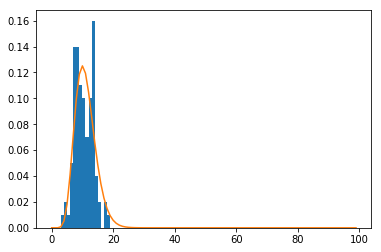

In [10]:
from scipy.stats import poisson


x = range(N)

plt.hist([rg.degree(n) for n in rg.nodes], x, normed=True)

plt.plot(x, poisson.pmf(C, x));

Calculando variação de *clustering coefficient* e *average distance* conforme aumentamos `num_nodes`:

In [11]:
x = []

rcc = []
rad = []

for num_nodes in range(C + 1, N):
    g = generate_random_graph(num_nodes, C)

    x.append(num_nodes)

    rcc.append(sn.clustering_coefficient(g))
    rad.append(sn.average_distance(g))

Plotando variação de *clustering coefficient*:

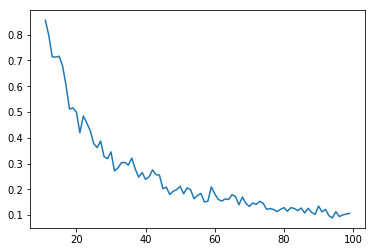

In [12]:
plt.plot(x, rcc);

Plotando variação de *average distance*:

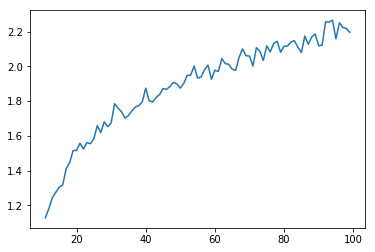

In [13]:
plt.plot(x, rad);

## Atividade 2

Definindo uma função que gera um grafo circular:

In [53]:
def generate_circular_graph(num_nodes, c):
    g = sn.generate_empty_graph(num_nodes)
 
    nodes = list(g.nodes)
 
    for i in range(num_nodes):
        n = nodes[i]
 
        for delta in range(1, c // 2 + 1):
            j = (i + delta) % num_nodes
 
            m = nodes[j]
 
            g.add_edge(n, m)
 
    return g

Calculando variação de *clustering coefficient* e *average distance* conforme aumentamos `num_nodes`:

In [54]:
ccc = []
cad = []

for num_nodes in x:
    g = generate_circular_graph(num_nodes, C)

    ccc.append(sn.clustering_coefficient(g))
    cad.append(sn.average_distance(g))

Plotando variação de *clustering coefficient*:

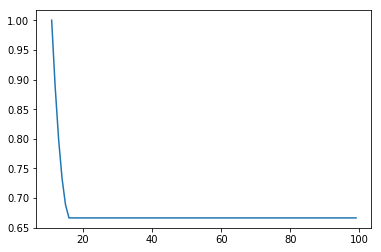

In [55]:
plt.plot(x, ccc);

Plotando variação de *average distance*:

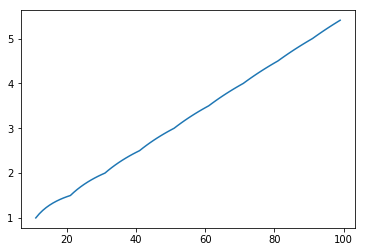

In [56]:
plt.plot(x, cad);

## Atividade 3

Definindo uma função que gera um grafo híbrido:

In [118]:
from random import choice

def generate_hybrid_graph(num_nodes, c, p):
    g = generate_circular_graph(num_nodes, c)

    for i in g.nodes():
        neighbors = list(g.neighbors(i))[:]
        for j in neighbors:
            if random() < p:
                g.remove_edge(i, j)
                new_node = choice(range(num_nodes))
                g.add_edge(i, new_node)
    return g

Os próximos gráficos serão para `N` e `C` fixos. Por conveniência, vamos repetir a definição.

In [119]:
N = 100
C = 10

Calculando variação de *clustering coefficient* e *average distance* conforme aumentamos `p`:

In [120]:
x = []

hcc = []
had = []

for ip in range(0, 11):
    p = ip / 10

    g = generate_hybrid_graph(N, C, p)

    x.append(p)

    hcc.append(sn.clustering_coefficient(g))
    had.append(sn.average_distance(g))

Comparando variação de *clustering coefficient* com o valor de referência do modelo aleatório.

Em um "pequeno mundo", espera-se um *clustering coefficient* acima desse valor de referência.

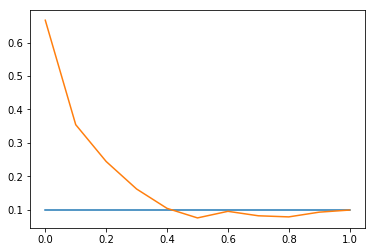

In [121]:
plt.plot(x, 11 * [C / N])
plt.plot(x, hcc);

Comparando variação de *average distance* com o valor de referência do modelo circular.

Em um "pequeno mundo", espera-se um *average distance* abaixo desse valor de referência.

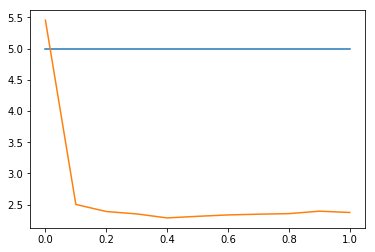

In [122]:
plt.plot(x, 11 * [N / (2 * C)])
plt.plot(x, had);

Para qual valor de `p` temos um "pequeno mundo"?